# Project 2 Yuchen Feng

In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Read the data and Set the first column as index

In [2]:
data = pd.read_csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/College.csv',index_col=0)
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Assign value to categorical data Private
##### Yes as 1, No as 0

In [3]:
num={'Yes':1,'No':0}
data['Private']=data['Private'].replace(num)
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
data.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Research Clarification
### Dependent Variable= Acceptance rate= Accept/ Apps

In [5]:
# create the dependent variable we need to study
data.insert(loc=1, column="AccRate", value=data['Accept']/data['Apps']*100)
data.head()

,Private,AccRate,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,74.216867,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,88.014639,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,76.820728,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,83.693046,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,75.647668,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
# to prevent multicollinearity
# we drop two variables that we use to calculate y
data=data.drop(columns=['Apps', 'Accept'])
data.head()

,Private,AccRate,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,74.216867,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,88.014639,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,76.820728,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,83.693046,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,75.647668,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
#save data after basic data cleaning
from pathlib import Path  
filepath = Path('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/College_Processed.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  

### Question 1 Variable Selection

#### (a) Using the Boruta Algorithm identify the top ∼10 predictors (could be fewer)

In [8]:
#library to use R in Python 
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [9]:
%%R
#install.packages("Boruta")
dataf<-read.csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/College_Processed.csv')
library(Boruta)
boruta.reg <- Boruta( AccRate~., data = dataf, doTrace = 2)

R[write to console]:  1. run of importance source...

R[write to console]:  2. run of importance source...

R[write to console]:  3. run of importance source...

R[write to console]:  4. run of importance source...

R[write to console]:  5. run of importance source...

R[write to console]:  6. run of importance source...

R[write to console]:  7. run of importance source...

R[write to console]:  8. run of importance source...

R[write to console]:  9. run of importance source...

R[write to console]:  10. run of importance source...

R[write to console]:  11. run of importance source...

R[write to console]: After 11 iterations, +3.8 secs: 

R[write to console]:  confirmed 14 attributes: Books, Enroll, Expend, F.Undergrad, Grad.Rate and 9 more;

R[write to console]:  rejected 1 attribute: X;

R[write to console]:  still have 2 attributes left.


R[write to console]:  12. run of importance source...

R[write to console]:  13. run of importance source...

R[write to console]:  14. run o

Boruta performed 28 iterations in 8.416763 secs.
 16 attributes confirmed important: Books, Enroll, Expend, F.Undergrad,
Grad.Rate and 11 more;
 1 attributes confirmed unimportant: X;


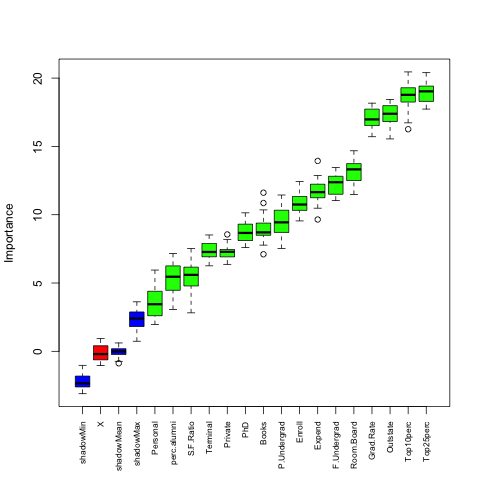

In [10]:
%%R

boruta.reg_result <- TentativeRoughFix(boruta.reg)
print(boruta.reg_result)

plot(boruta.reg_result, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.reg_result$ImpHistory),function(i)
  boruta.reg_result$ImpHistory[is.finite(boruta.reg_result$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.reg_result$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
     at = 1:ncol(boruta.reg_result$ImpHistory), cex.axis = 0.7)

We can get top 10 independent variables that is Top25perc, Top10perc, Grad.Rate, Outstate, Room.Board, F.Undergrad, Expend, Enroll, Books, P.Undergrad

#### Drop other variables, create data1 dataset for further study

In [11]:
data1=data[['AccRate', 'Top25perc', 'Top10perc', 'Grad.Rate', 'Outstate', 'Room.Board', 'F.Undergrad', 'Expend', 'Enroll', 'Books', 'P.Undergrad']]
#rename some columns to be more readble
data1=data1.rename(columns={'Grad.Rate': 'GradRate', 'Room.Board': 'RoomBoard','F.Undergrad':'FUndergrad','P.Undergrad':'PUndergrad'})
data1.head()

,AccRate,Top25perc,Top10perc,GradRate,Outstate,RoomBoard,FUndergrad,Expend,Enroll,Books,PUndergrad
Abilene Christian University,74.216867,52,23,60,7440,3300,2885,7041,721,450,537
Adelphi University,88.014639,29,16,56,12280,6450,2683,10527,512,750,1227
Adrian College,76.820728,50,22,54,11250,3750,1036,8735,336,400,99
Agnes Scott College,83.693046,89,60,59,12960,5450,510,19016,137,450,63
Alaska Pacific University,75.647668,44,16,15,7560,4120,249,10922,55,800,869


In [12]:
qu=data1.quantile(0.95)

In [13]:
#create copy for alternate use
data2=data1.copy()

In [14]:
#save data after Boruta
from pathlib import Path  
filepath = Path('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/College_Processed1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data1.to_csv(filepath)

#### (b) Based on your findings from parts (a) select your preferred choice of predictors (at least∼5). These are the ones you will work with for your actual analysis in parts (2) and (3).

In [15]:
from RegscorePy import mallow

In [16]:
subdat = data1[['AccRate', 'Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad']].copy()

import itertools

# get the base model, y and its fitted values
model = smf.ols(formula='AccRate ~ Top25perc+Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad', data=data1)
results = model.fit()
y = data1['AccRate']
y_pred=results.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 11 # number of parameters in orginal model (includes y-intercept)

for L in range(1, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        # join the strings in the data together
        formula1 = 'AccRate~'+'+'.join(subset)
        
        # get the cp
        results = smf.ols(formula=formula1, data = data1).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        
        # add to the dataframe
        #storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
        storage_cp = pd.concat([storage_cp,pd.DataFrame.from_records([{'Variables': subset, 'CP': cp}])])

In [17]:
storage_cp.sort_values(by = "CP")

,Variables,CP
0,"(Top10perc, GradRate, Outstate, RoomBoard, FUn...",9.243603
0,"(Top10perc, GradRate, Outstate, RoomBoard, Exp...",10.475575
0,"(Top25perc, Top10perc, GradRate, Outstate, Roo...",11.0
0,"(Top10perc, GradRate, Outstate, RoomBoard, Exp...",11.003679
0,"(Top10perc, GradRate, Outstate, RoomBoard, FUn...",12.192028
...,...,...
0,"(FUndergrad, Enroll)",327.981834
0,"(FUndergrad, PUndergrad)",328.028006
0,"(Enroll, PUndergrad)",328.945982
0,"(FUndergrad, Enroll, PUndergrad)",329.945889


In [18]:
selected=storage_cp.sort_values(by = "CP").head(10)

In [19]:
#save data after variables selection
from pathlib import Path  
filepath = Path('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/Variable_Selection.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
selected.to_csv(filepath)  

Top 10 Variables Combinations
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Books', 'PUndergrad')<br />
('Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Books', 'PUndergrad')<br />
('Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Books', 'PUndergrad')<br />
('Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
('Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Books', 'PUndergrad')<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'PUndergrad')<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'PUndergrad')<br />

After reviewing Cp score, we retain 10 combinations. And we find that almost all combinations contain most of 10 variables we obtain from Boruta 


'Top25perc','Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad'

Thus, we will not try to delete variables in the current step, but try to perfrom 10 variables' univariate analysis on Question B.

So we still use our data1 dataset.

### Question 2 Descriptive Analysis

#### (a) Begin by providing a descriptive analysis of your variables. This should include things like histograms, quantile plots, correlation plots, etc.

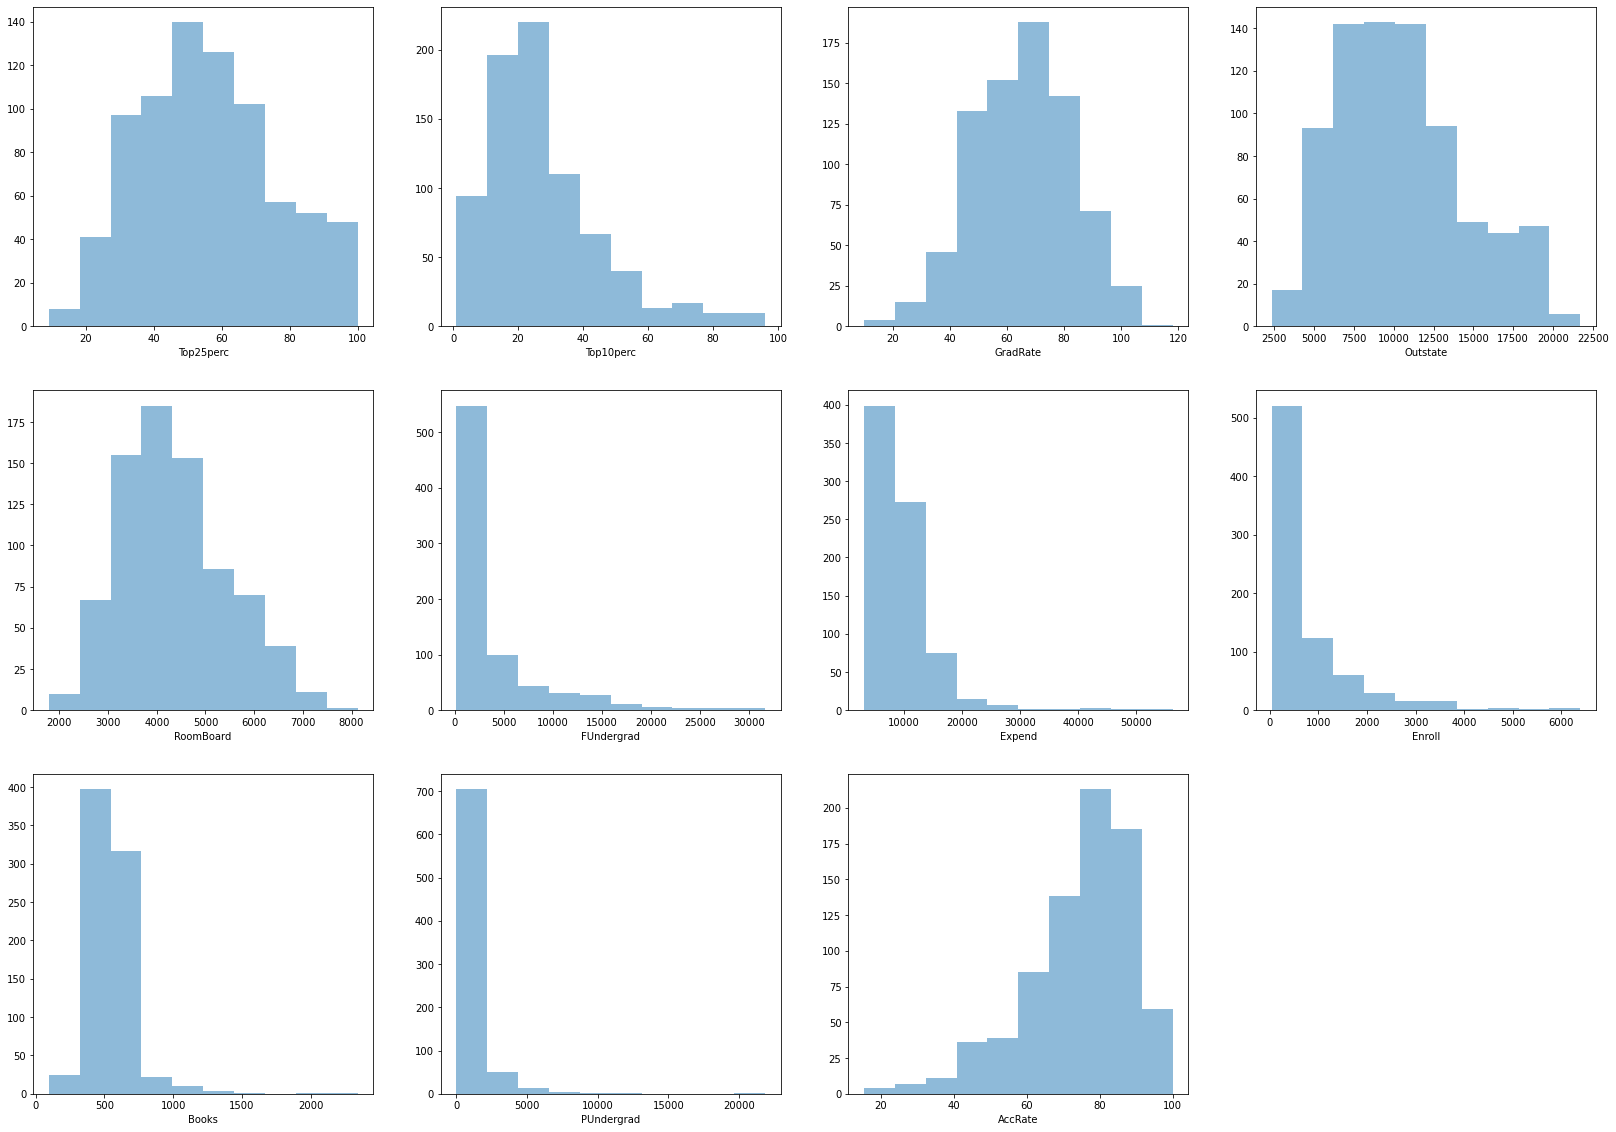

In [20]:
#'Top25perc','Top10perc', 'GradRate', 'Outstate', 
#'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 
#'PUndergrad'

#Histogram
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = data1.Top25perc
res = plt.hist(x1,alpha = .5)
label=plt.xlabel("Top25perc")

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = data1.Top10perc
res = plt.hist(x2,alpha = .5)
label=plt.xlabel("Top10perc")

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = data1.GradRate
res = plt.hist(x3,alpha = .5)
label=plt.xlabel("GradRate")

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = data1.Outstate
res = plt.hist(x4,alpha = .5)
label=plt.xlabel("Outstate")

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = data1.RoomBoard
res = plt.hist(x5,alpha = .5)
label=plt.xlabel("RoomBoard")

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = data1.FUndergrad
res = plt.hist(x6,alpha = .5)
label=plt.xlabel("FUndergrad")

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = data1.Expend
res = plt.hist(x7,alpha = .5)
label=plt.xlabel("Expend")

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = data1.Enroll
res = plt.hist(x8,alpha = .5)
label=plt.xlabel("Enroll")

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = data1.Books
res = plt.hist(x9,alpha = .5)
label=plt.xlabel("Books")

ax10 = plt.subplot2grid((3,4), (2, 1))
x10 = data1.PUndergrad
res = plt.hist(x10,alpha = .5)
label=plt.xlabel("PUndergrad")

ax11 = plt.subplot2grid((3,4), (2,2))
x11 = data1.AccRate
res = plt.hist(x11,alpha = .5)
label=plt.xlabel("AccRate")


plt.show()

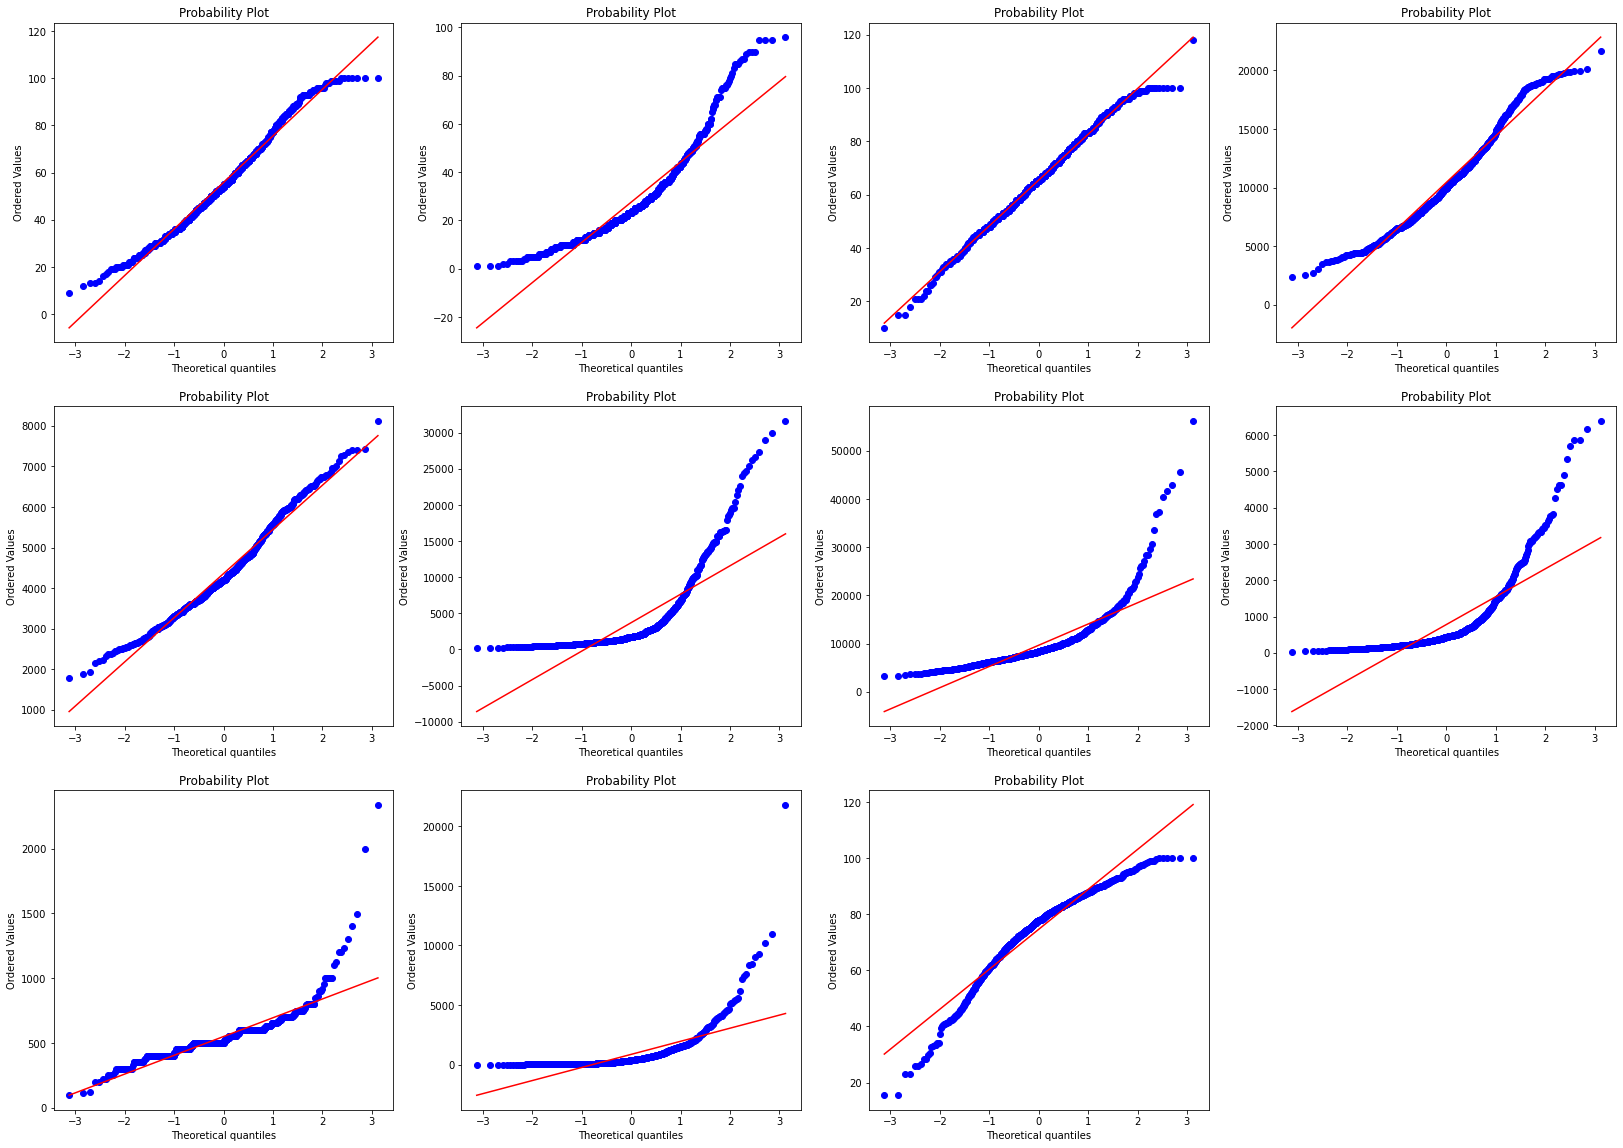

In [21]:
import numpy as np 
import scipy.stats as stats

#'Top25perc','Top10perc', 'GradRate', 'Outstate', 
#'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 
#'PUndergrad'

#QQ Plot
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = data.Top25perc
res = stats.probplot(x1,dist="norm", plot=plt)

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = data1.Top10perc
res = stats.probplot(x2,dist="norm", plot=plt)

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = data1.GradRate
res = stats.probplot(x3,dist="norm", plot=plt)

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = data1.Outstate
res = stats.probplot(x4,dist="norm", plot=plt)

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = data1.RoomBoard
res = stats.probplot(x5,dist="norm", plot=plt)

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = data1.FUndergrad
res = stats.probplot(x6,dist="norm", plot=plt)

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = data1.Expend
res = stats.probplot(x7,dist="norm", plot=plt)

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = data1.Enroll
res = stats.probplot(x8,dist="norm", plot=plt)

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = data1.Books
res = stats.probplot(x9,dist="norm", plot=plt)

ax10 = plt.subplot2grid((3,4), (2, 1))
x10 = data1.PUndergrad
res = stats.probplot(x10,dist="norm", plot=plt)

ax11 = plt.subplot2grid((3,4), (2,2))
x11 = data1.AccRate
res = stats.probplot(x11,dist="norm", plot=plt)


plt.show()

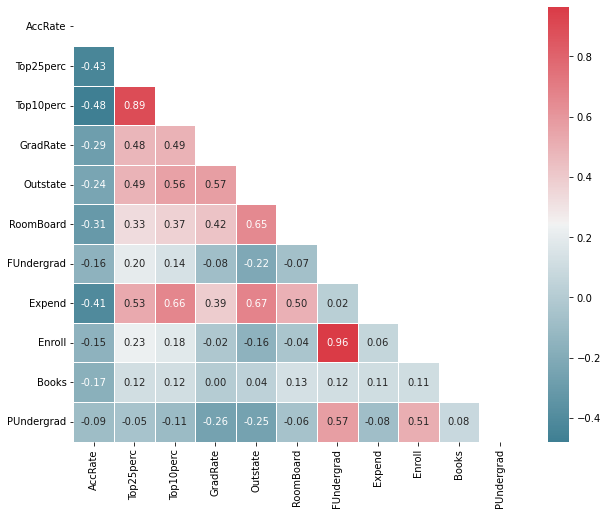

In [22]:
#Correlation Plot

import seaborn as sns

sub_data =  data1[['AccRate', 'Top25perc', 'Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad']]
corr = sub_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

From the correlation chart, we can see that Top25perc and Top10perc, FUndergrad and Enroll are two highly correlated groups. Since the top variable combination from the Mallow Cp also shows that Top25perc can be omitted, we try to delete Top25perc and keep the remain 9 variables. 

#### (b)Estimate density plots for all your variables, and show the respective fitted distributions.

Text(0.5, 0, 'PUndergrad')

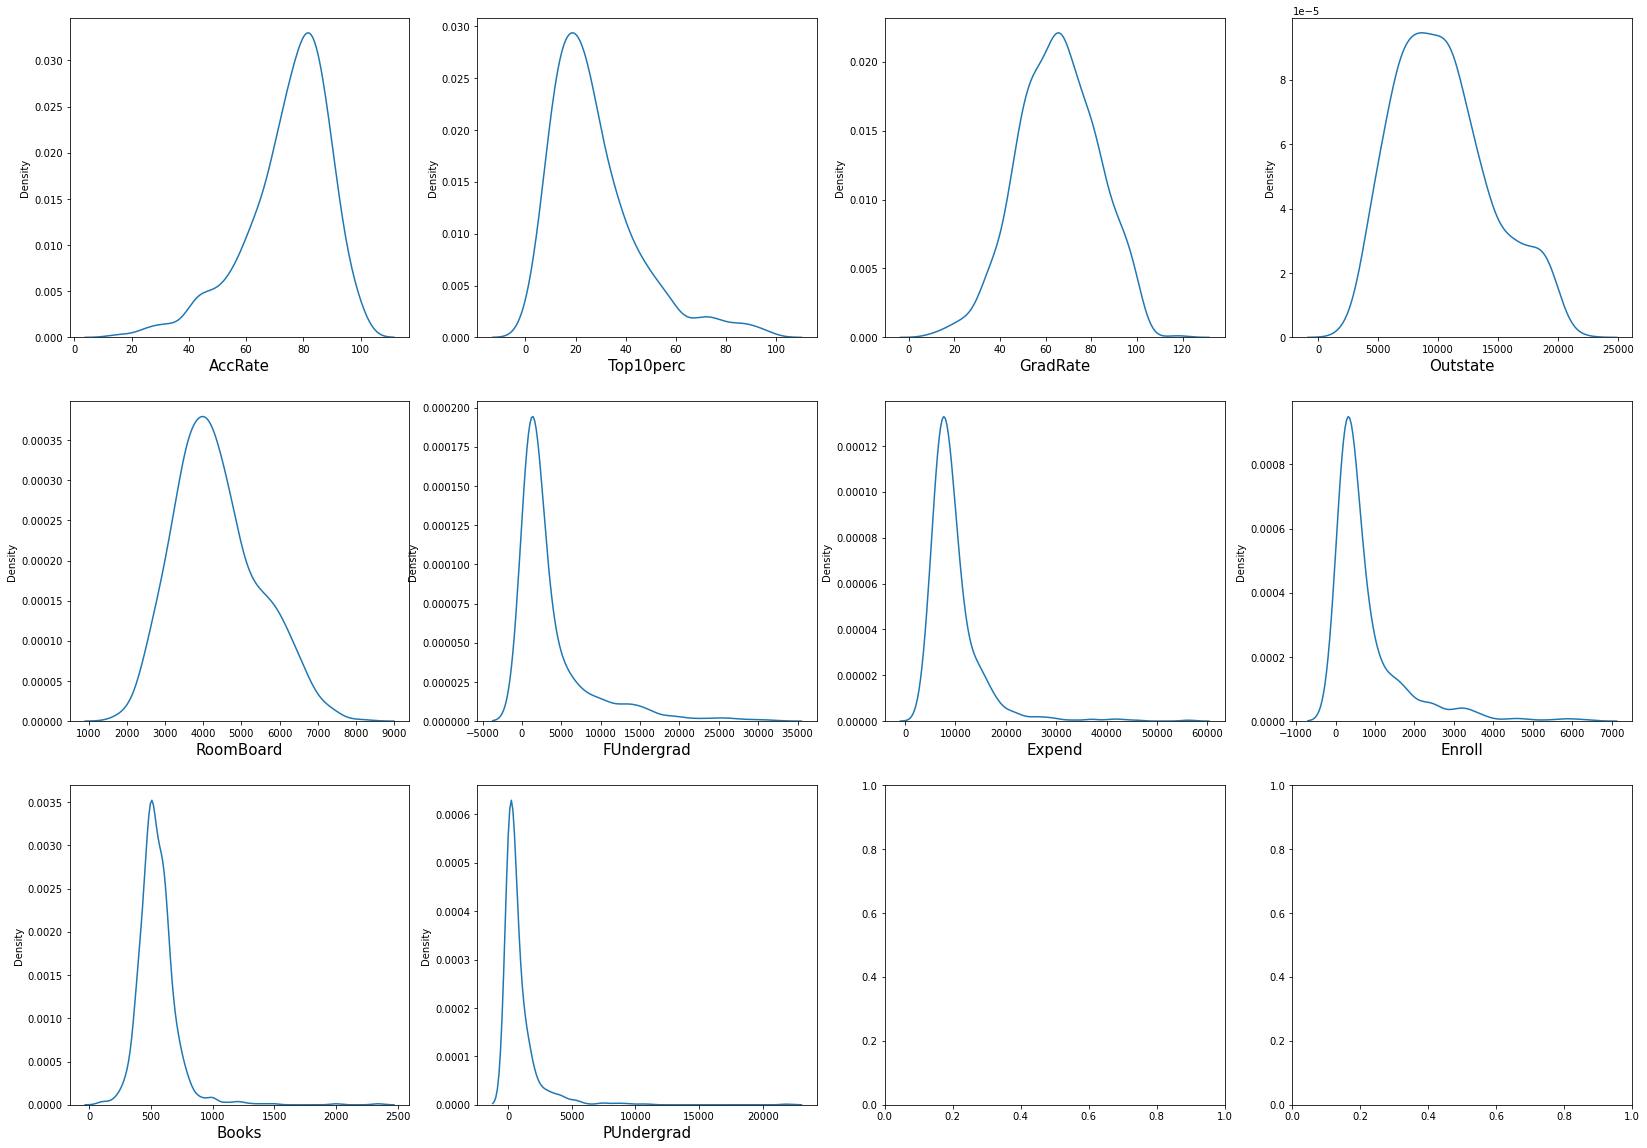

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(28, 20))

#'Top10perc', 'GradRate', 'Outstate', 
#'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 
#'PUndergrad'

sns.kdeplot(ax=axes[0,0], data=data1, x='AccRate')
axes[0,0].set_xlabel('AccRate',fontsize=15)
sns.kdeplot(ax=axes[0, 1], data=data1, x='Top10perc')
axes[0,1].set_xlabel('Top10perc',fontsize=15)
sns.kdeplot(ax=axes[0, 2],data=data1,x='GradRate')
axes[0,2].set_xlabel('GradRate',fontsize=15)
sns.kdeplot(ax=axes[0, 3],data=data1, x='Outstate')
axes[0,3].set_xlabel('Outstate',fontsize=15)

sns.kdeplot(ax=axes[1, 0],data=data1,x='RoomBoard')
axes[1,0].set_xlabel('RoomBoard',fontsize=15)
sns.kdeplot(ax=axes[1, 1],data=data1,x='FUndergrad')
axes[1,1].set_xlabel('FUndergrad',fontsize=15)
sns.kdeplot(ax=axes[1, 2],data=data1,x='Expend')
axes[1,2].set_xlabel('Expend',fontsize=15)
sns.kdeplot(ax=axes[1, 3],data=data1,x='Enroll')
axes[1,3].set_xlabel('Enroll',fontsize=15)

sns.kdeplot(ax=axes[2, 0],data=data1, x='Books')
axes[2,0].set_xlabel('Books',fontsize=15)
sns.kdeplot(ax=axes[2, 1],data=data1, x='PUndergrad')
axes[2,1].set_xlabel('PUndergrad',fontsize=15)



#### (c)Identify if there are any non-linearities within your variables. What transformations should you perform to make them linear? What would happen if you included nonlinear variables in your regression models without transforming them first?

In [24]:
%%R
dataf1<-read.csv('/Users/hongtingfei/Desktop/MQE/2022-2023Fall/Econ430/College_Processed1.csv')
# head(dataf1)
library(car)

R[write to console]: Loading required package: carData



In [25]:
%%R
summary(powerTransform(cbind(Top10perc, GradRate, Outstate, RoomBoard, FUndergrad, Expend, Enroll, Books, PUndergrad, AccRate) ~ 1, data=dataf1))

bcPower Transformations to Multinormality 
           Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Top10perc     0.4513        0.50       0.3771       0.5255
GradRate      1.2236        1.22       1.0397       1.4075
Outstate      0.5662        0.50       0.4393       0.6930
RoomBoard     0.2619        0.33       0.0572       0.4667
FUndergrad    0.0064        0.00      -0.0348       0.0476
Expend       -0.3206       -0.33      -0.4166      -0.2245
Enroll        0.0449        0.04       0.0021       0.0877
Books         0.1314        0.13       0.0213       0.2416
PUndergrad    0.1373        0.14       0.1049       0.1698
AccRate       2.3129        2.31       2.0174       2.6083

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                             LRT df       pval
LR test, lambda = (0 0 0 0 0 0 0 0 0 0) 967.3271 10 < 2.22e-16

Likelihood ratio test that no transformations are needed
                            

We use Box-Cox to view variables seperately. And judge from figures in Rounded Power, we can get hint from how to transform our data.

If we include non-linearn variables into the model, the linear relation may no longer suitable.

#### (d)Comment on any outliers and/or unusual features of your variables, and then justify their removal, exclusion or imputation.

In [26]:
data1.describe()

,AccRate,Top25perc,Top10perc,GradRate,Outstate,RoomBoard,FUndergrad,Expend,Enroll,Books,PUndergrad
count,777.000000,777.000000,777.000000,777.00000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,74.692771,55.796654,27.558559,65.46332,10440.669241,4357.526384,3699.907336,9660.171171,779.972973,549.380952,855.298584
std,14.710392,19.804778,17.640364,17.17771,4023.016484,1096.696416,4850.420531,5221.768440,929.176190,165.105360,1522.431887
min,15.448631,9.000000,1.000000,10.00000,2340.000000,1780.000000,139.000000,3186.000000,35.000000,96.000000,1.000000
25%,67.564745,41.000000,15.000000,53.00000,7320.000000,3597.000000,992.000000,6751.000000,242.000000,470.000000,95.000000
50%,77.875000,54.000000,23.000000,65.00000,9990.000000,4200.000000,1707.000000,8377.000000,434.000000,500.000000,353.000000
75%,84.852217,69.000000,35.000000,78.00000,12925.000000,5050.000000,4005.000000,10830.000000,902.000000,600.000000,967.000000
max,100.000000,100.000000,96.000000,118.00000,21700.000000,8124.000000,31643.000000,56233.000000,6392.000000,2340.000000,21836.000000


In [27]:
data1.skew()

AccRate      -1.068202
Top25perc     0.259340
Top10perc     1.413217
GradRate     -0.113777
Outstate      0.509278
RoomBoard     0.477356
FUndergrad    2.610458
Expend        3.459322
Enroll        2.690465
Books         3.485025
PUndergrad    5.692353
dtype: float64

Text(0.5, 0, 'PUndergrad')

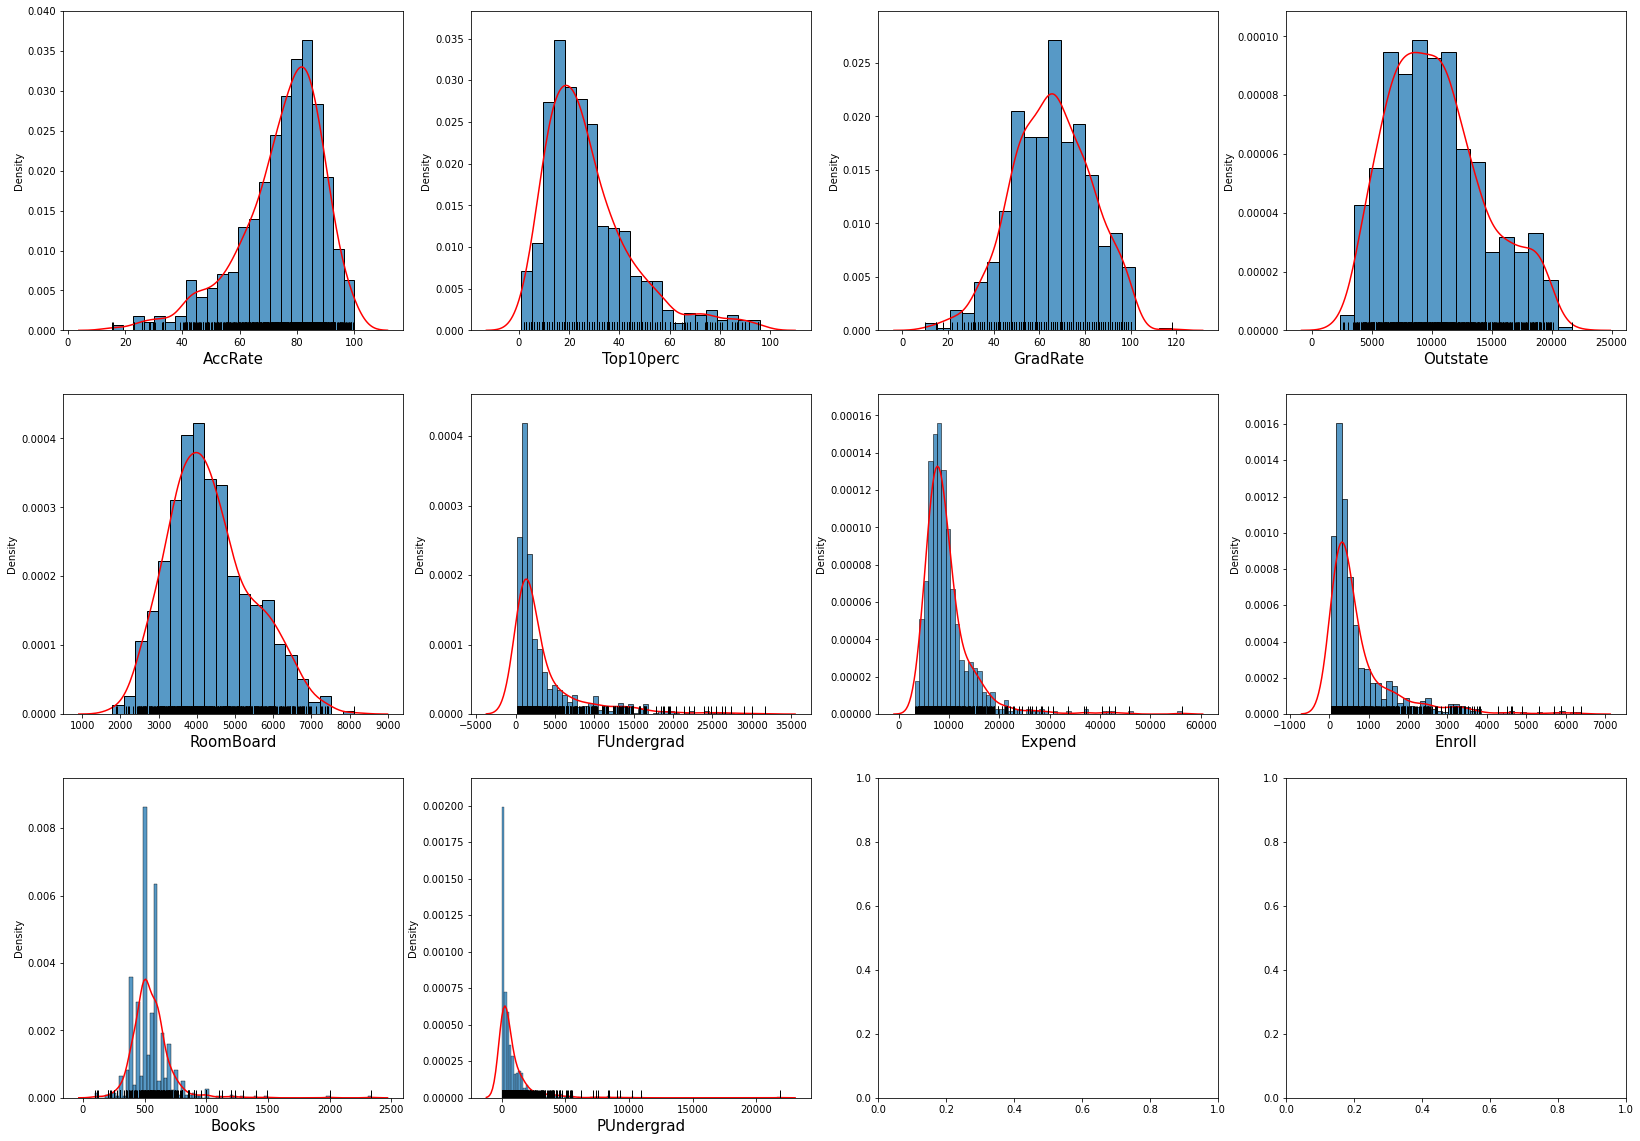

In [28]:
fig, axes = plt.subplots(3, 4, figsize=(28, 20))

#'Top10perc', 'GradRate', 'Outstate', 
#'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 
#'PUndergrad'

sns.histplot(ax=axes[0,0], data=data1, x='AccRate',stat = "density")
sns.kdeplot(ax=axes[0,0], data=data1, x='AccRate', color = "red")
sns.rugplot(ax=axes[0,0], data=data1, x='AccRate',color = "black")
axes[0,0].set_xlabel('AccRate',fontsize=15)

sns.histplot(ax=axes[0, 1], data=data1, x='Top10perc',stat = "density")
sns.kdeplot(ax=axes[0, 1], data=data1, x='Top10perc', color = "red")
sns.rugplot(ax=axes[0, 1], data=data1, x='Top10perc',color = "black")
axes[0,1].set_xlabel('Top10perc',fontsize=15)

sns.histplot(ax=axes[0, 2],data=data1,x='GradRate',stat = "density")
sns.kdeplot(ax=axes[0, 2],data=data1,x='GradRate', color = "red")
sns.rugplot(ax=axes[0, 2],data=data1,x='GradRate',color = "black")
axes[0,2].set_xlabel('GradRate',fontsize=15)

sns.histplot(ax=axes[0, 3],data=data1, x='Outstate',stat = "density")
sns.kdeplot(ax=axes[0, 3],data=data1, x='Outstate', color = "red")
sns.rugplot(ax=axes[0, 3],data=data1, x='Outstate',color = "black")
axes[0,3].set_xlabel('Outstate',fontsize=15)


sns.histplot(ax=axes[1, 0],data=data1,x='RoomBoard',stat = "density")
sns.kdeplot(ax=axes[1, 0],data=data1,x='RoomBoard', color = "red")
sns.rugplot(ax=axes[1, 0],data=data1,x='RoomBoard',color = "black")
axes[1,0].set_xlabel('RoomBoard',fontsize=15)

sns.histplot(ax=axes[1, 1],data=data1,x='FUndergrad',stat = "density")
sns.kdeplot(ax=axes[1, 1],data=data1,x='FUndergrad', color = "red")
sns.rugplot(ax=axes[1, 1],data=data1,x='FUndergrad',color = "black")
axes[1,1].set_xlabel('FUndergrad',fontsize=15)

sns.histplot(ax=axes[1, 2],data=data1,x='Expend',stat = "density")
sns.kdeplot(ax=axes[1, 2],data=data1,x='Expend', color = "red")
sns.rugplot(ax=axes[1, 2],data=data1,x='Expend',color = "black")
axes[1,2].set_xlabel('Expend',fontsize=15)

sns.histplot(ax=axes[1, 3],data=data1,x='Enroll',stat = "density")
sns.kdeplot(ax=axes[1, 3],data=data1,x='Enroll', color = "red")
sns.rugplot(ax=axes[1, 3],data=data1,x='Enroll',color = "black")
axes[1,3].set_xlabel('Enroll',fontsize=15)

sns.histplot(ax=axes[2, 0],data=data1, x='Books',stat = "density")
sns.kdeplot(ax=axes[2, 0],data=data1, x='Books', color = "red")
sns.rugplot(ax=axes[2, 0],data=data1, x='Books',color = "black")
axes[2,0].set_xlabel('Books',fontsize=15)

sns.histplot(ax=axes[2, 1],data=data1, x='PUndergrad',stat = "density")
sns.kdeplot(ax=axes[2, 1],data=data1, x='PUndergrad', color = "red")
sns.rugplot(ax=axes[2, 1],data=data1, x='PUndergrad',color = "black")
axes[2,1].set_xlabel('PUndergrad',fontsize=15)



Viewing skewness, rugplot and histogram combinely, we can tell that'FUndergrad','Expend','Enroll','Books','Pundergrad' shows potential bias. Where the observations becomes sparser, when x-axis increase.

Since they do not take up too many, we try to first run linear regression without any change, then use imputation method which assign outlier with mean values to deal with outlier instead of simply dropping them due to the not very large dataset. And if the regression result becomes poorer, we try to remove some outliers.

In [29]:
result = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad', data = data1)
result = result.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     40.05
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.26e-58
Time:                        13:47:07   Log-Likelihood:                -3041.4
No. Observations:                 777   AIC:                             6103.
Df Residuals:                     767   BIC:                             6149.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0240      2.580     39.548      0.000      96.960     107.088
Top10perc     -0.3075      0.037     -8.304      0.000      -0.380      -0.235
GradRate      -0.1220      0.033     -3.667      0.000      -0.187      -0.057
Outstate       0.0010      0.000      5.216      0.000       0.001       0.001
RoomBoard     -0.0025      0.001     -4.672      0.000      -0.004      -0.001
FUndergrad    -0.0007      0.000     -1.940      0.053      -0.001    8.59e-06
Expend        -0.0006      0.000     -4.612      0.000      -0.001      -0.000
Enroll         0.0041      0.002      2.226      0.026       0.000       0.008
Books         -0.0076      0.003     -2.782      0.006      -0.013      -0.002
PUndergrad    -0.0011      0.000     -3.058      0.002      -0.002      -0.000
==============================================================================
Omnibus:                       39.829   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.349
Skew:                          -0.542   Prob(JB):                     1.42e-10
Kurtosis:                       3.476   Cond. No.                     9.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0.5, 33.0, 'Predicted'), Text(288.49090909090904, 0.5, 'Residuals')]

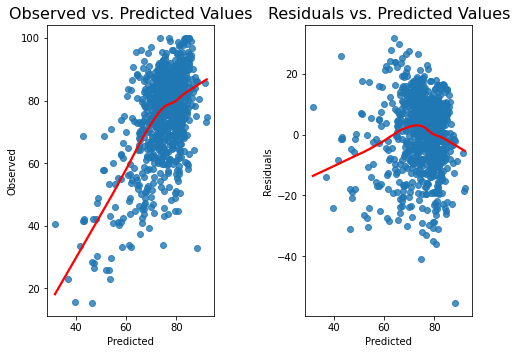

In [30]:
# Plot y vs y_hat
fig, ax = plt.subplots(1,2,figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=result.fittedvalues, y=data1['AccRate'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

#### Assign Outlier with Mean
##### Since winsorization will affect the kdeplot greatly, the better choice is to use mean

In [31]:
data1["FUndergrad"].loc[data1["FUndergrad"] > data1['FUndergrad'].quantile(.95)] = data1['FUndergrad'].mean()
data1["Expend"].loc[data1["Expend"] > data1['Expend'].quantile(.95)] = data1['Expend'].mean()
data1["Enroll"].loc[data1["Enroll"] > data1['Enroll'].quantile(.95)] = data1['Enroll'].mean()
data1["Books"].loc[data1["Books"] > data1['Books'].quantile(.95)] = data1['Books'].mean()
data1["PUndergrad"].loc[data1["PUndergrad"] > data1['PUndergrad'].quantile(.95)] = data1['PUndergrad'].mean()

In [32]:
data1.describe()

,AccRate,Top25perc,Top10perc,GradRate,Outstate,RoomBoard,FUndergrad,Expend,Enroll,Books,PUndergrad
count,777.000000,777.000000,777.000000,777.00000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,74.692771,55.796654,27.558559,65.46332,10440.669241,4357.526384,2895.306803,8822.901770,624.898257,526.073175,604.202889
std,14.710392,19.804778,17.640364,17.17771,4023.016484,1096.696416,2964.019278,2913.432027,556.432014,102.650988,676.993032
min,15.448631,9.000000,1.000000,10.00000,2340.000000,1780.000000,139.000000,3186.000000,35.000000,96.000000,1.000000
25%,67.564745,41.000000,15.000000,53.00000,7320.000000,3597.000000,992.000000,6751.000000,242.000000,470.000000,95.000000
50%,77.875000,54.000000,23.000000,65.00000,9990.000000,4200.000000,1707.000000,8377.000000,434.000000,500.000000,353.000000
75%,84.852217,69.000000,35.000000,78.00000,12925.000000,5050.000000,3699.907336,10093.000000,779.972973,600.000000,855.298584
max,100.000000,100.000000,96.000000,118.00000,21700.000000,8124.000000,14445.000000,17960.000000,2738.000000,765.000000,3286.000000


Text(0.5, 0, 'PUndergrad')

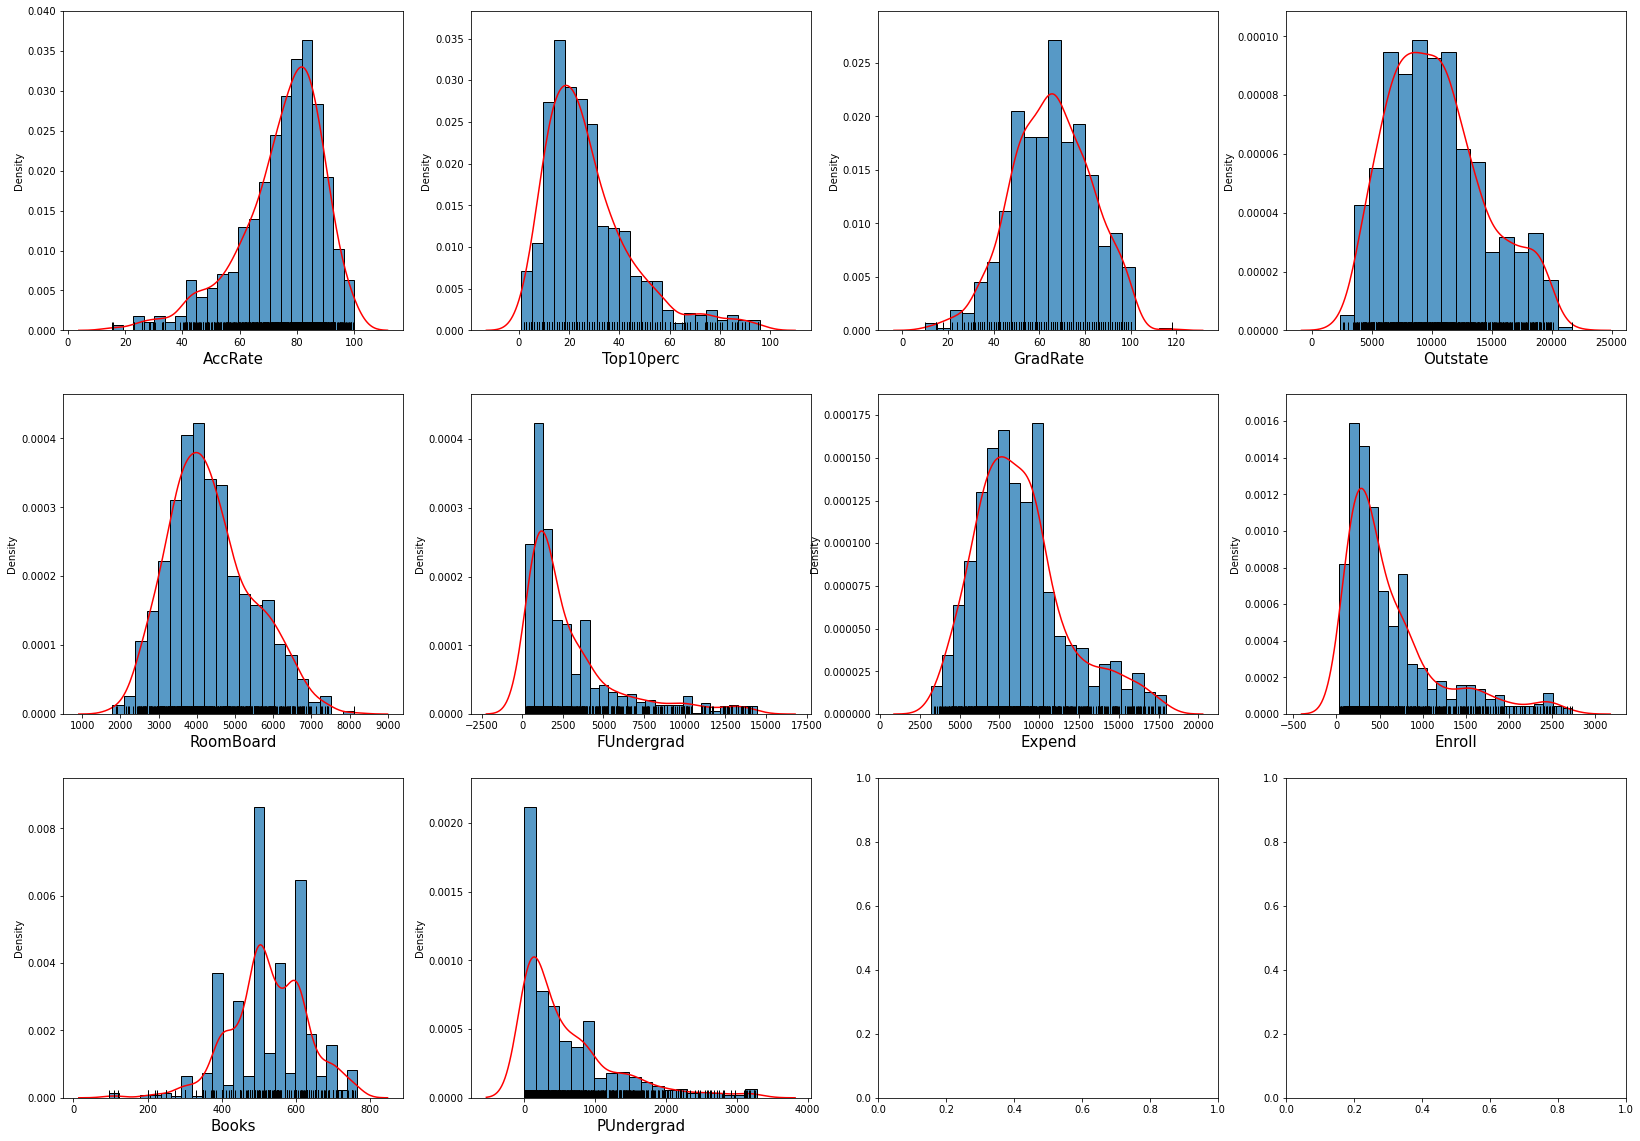

In [33]:
fig, axes = plt.subplots(3, 4, figsize=(28, 20))

#'Top25perc','Top10perc', 'GradRate', 'Outstate', 
#'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 
#'PUndergrad'

sns.histplot(ax=axes[0,0], data=data1, x='AccRate',stat = "density")
sns.kdeplot(ax=axes[0,0], data=data1, x='AccRate', color = "red")
sns.rugplot(ax=axes[0,0], data=data1, x='AccRate',color = "black")
axes[0,0].set_xlabel('AccRate',fontsize=15)

sns.histplot(ax=axes[0, 1], data=data1, x='Top10perc',stat = "density")
sns.kdeplot(ax=axes[0, 1], data=data1, x='Top10perc', color = "red")
sns.rugplot(ax=axes[0, 1], data=data1, x='Top10perc',color = "black")
axes[0,1].set_xlabel('Top10perc',fontsize=15)

sns.histplot(ax=axes[0, 2],data=data1,x='GradRate',stat = "density")
sns.kdeplot(ax=axes[0, 2],data=data1,x='GradRate', color = "red")
sns.rugplot(ax=axes[0, 2],data=data1,x='GradRate',color = "black")
axes[0,2].set_xlabel('GradRate',fontsize=15)

sns.histplot(ax=axes[0, 3],data=data1, x='Outstate',stat = "density")
sns.kdeplot(ax=axes[0, 3],data=data1, x='Outstate', color = "red")
sns.rugplot(ax=axes[0, 3],data=data1, x='Outstate',color = "black")
axes[0,3].set_xlabel('Outstate',fontsize=15)


sns.histplot(ax=axes[1, 0],data=data1,x='RoomBoard',stat = "density")
sns.kdeplot(ax=axes[1, 0],data=data1,x='RoomBoard', color = "red")
sns.rugplot(ax=axes[1, 0],data=data1,x='RoomBoard',color = "black")
axes[1,0].set_xlabel('RoomBoard',fontsize=15)

sns.histplot(ax=axes[1, 1],data=data1,x='FUndergrad',stat = "density")
sns.kdeplot(ax=axes[1, 1],data=data1,x='FUndergrad', color = "red")
sns.rugplot(ax=axes[1, 1],data=data1,x='FUndergrad',color = "black")
axes[1,1].set_xlabel('FUndergrad',fontsize=15)

sns.histplot(ax=axes[1, 2],data=data1,x='Expend',stat = "density")
sns.kdeplot(ax=axes[1, 2],data=data1,x='Expend', color = "red")
sns.rugplot(ax=axes[1, 2],data=data1,x='Expend',color = "black")
axes[1,2].set_xlabel('Expend',fontsize=15)

sns.histplot(ax=axes[1, 3],data=data1,x='Enroll',stat = "density")
sns.kdeplot(ax=axes[1, 3],data=data1,x='Enroll', color = "red")
sns.rugplot(ax=axes[1, 3],data=data1,x='Enroll',color = "black")
axes[1,3].set_xlabel('Enroll',fontsize=15)

sns.histplot(ax=axes[2, 0],data=data1, x='Books',stat = "density")
sns.kdeplot(ax=axes[2, 0],data=data1, x='Books', color = "red")
sns.rugplot(ax=axes[2, 0],data=data1, x='Books',color = "black")
axes[2,0].set_xlabel('Books',fontsize=15)

sns.histplot(ax=axes[2, 1],data=data1, x='PUndergrad',stat = "density")
sns.kdeplot(ax=axes[2, 1],data=data1, x='PUndergrad', color = "red")
sns.rugplot(ax=axes[2, 1],data=data1, x='PUndergrad',color = "black")
axes[2,1].set_xlabel('PUndergrad',fontsize=15)



In [34]:
result1 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad', data = data1)
result1 = result1.fit()

result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     36.31
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.12e-53
Time:                        13:47:09   Log-Likelihood:                -3053.1
No. Observations:                 777   AIC:                             6126.
Df Residuals:                     767   BIC:                             6173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.2233      3.207     32.498      0.000      97.928     110.519
Top10perc     -0.3528      0.034    -10.371      0.000      -0.420      -0.286
GradRate      -0.0774      0.033     -2.323      0.020      -0.143      -0.012
Outstate       0.0006      0.000      2.631      0.009       0.000       0.001
RoomBoard     -0.0030      0.001     -5.345      0.000      -0.004      -0.002
FUndergrad    -0.0005      0.000     -1.547      0.122      -0.001       0.000
Expend         0.0002      0.000      0.706      0.480      -0.000       0.001
Enroll        -0.0008      0.002     -0.458      0.647      -0.004       0.003
Books         -0.0131      0.005     -2.905      0.004      -0.022      -0.004
PUndergrad -3.436e-05      0.001     -0.042      0.966      -0.002       0.002
==============================================================================
Omnibus:                       46.126   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.282
Skew:                          -0.598   Prob(JB):                     2.69e-12
Kurtosis:                       3.462   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0.5, 33.0, 'Predicted'), Text(288.49090909090904, 0.5, 'Residuals')]

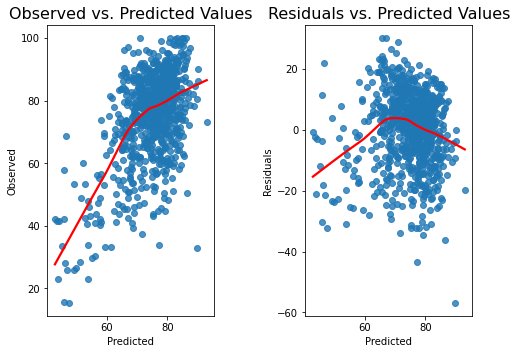

In [35]:
# Plot y vs y_hat
fig, ax = plt.subplots(1,2,figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=result1.fittedvalues, y=data1['AccRate'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=result1.fittedvalues, y=result1.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

#### Delete Outlier(1%)
##### Since imputation worse the result.

In [36]:
Qd = data2[['FUndergrad','Enroll','Expend','Books','PUndergrad']].quantile(0.001)
Qu = data2[['FUndergrad','Enroll','Expend','Books','PUndergrad']].quantile(0.999)

bool_data2 = pd.DataFrame()
for index in Qd.keys():
    bool_col = (data2[index] >= Qd[index]).values & (data2[index] <= Qu[index]).values
    bool_data2[index] = bool_col
bool_data2 = bool_data2.all(axis=1).values
data2=data2.loc[bool_data2]
data2

,AccRate,Top25perc,Top10perc,GradRate,Outstate,RoomBoard,FUndergrad,Expend,Enroll,Books,PUndergrad
Abilene Christian University,74.216867,52,23,60,7440,3300,2885,7041,721,450,537
Adelphi University,88.014639,29,16,56,12280,6450,2683,10527,512,750,1227
Adrian College,76.820728,50,22,54,11250,3750,1036,8735,336,400,99
Agnes Scott College,83.693046,89,60,59,12960,5450,510,19016,137,450,63
Alaska Pacific University,75.647668,44,16,15,7560,4120,249,10922,55,800,869
...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,68.957670,26,4,40,6797,3900,3089,4469,543,500,2029
Xavier University,92.138846,47,24,83,11520,4960,2849,9189,695,600,1107
Xavier University of Louisiana,91.320935,61,34,49,6900,4200,2793,8323,695,617,166
Yale University,22.914526,99,95,99,19840,6510,5217,40386,1317,630,83


In [37]:
result2 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad', data = data2)
result2 = result2.fit()

result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     38.90
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.08e-57
Time:                        13:47:09   Log-Likelihood:                -3011.2
No. Observations:                 769   AIC:                             6042.
Df Residuals:                     759   BIC:                             6089.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.3047      2.683     38.129      0.000      97.037     107.572
Top10perc     -0.3058      0.038     -8.140      0.000      -0.380      -0.232
GradRate      -0.1227      0.033     -3.667      0.000      -0.188      -0.057
Outstate       0.0010      0.000      5.246      0.000       0.001       0.001
RoomBoard     -0.0025      0.001     -4.563      0.000      -0.004      -0.001
FUndergrad    -0.0007      0.000     -1.749      0.081      -0.001    8.58e-05
Expend        -0.0007      0.000     -4.599      0.000      -0.001      -0.000
Enroll         0.0041      0.002      2.120      0.034       0.000       0.008
Books         -0.0078      0.003     -2.625      0.009      -0.014      -0.002
PUndergrad    -0.0013      0.000     -2.838      0.005      -0.002      -0.000
==============================================================================
Omnibus:                       37.121   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.039
Skew:                          -0.520   Prob(JB):                     7.43e-10
Kurtosis:                       3.478   Cond. No.                     9.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0.5, 33.0, 'Predicted'), Text(288.49090909090904, 0.5, 'Residuals')]

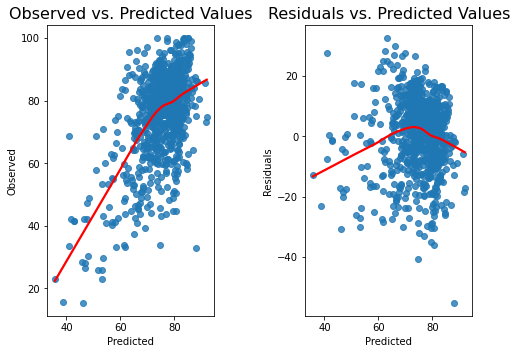

In [38]:
# Plot y vs y_hat
fig, ax = plt.subplots(1,2,figsize=(8, 6))
fig.tight_layout(pad=6.0)
sns.regplot(x=result2.fittedvalues, y=data2['AccRate'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=result2.fittedvalues, y=result2.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

Judge from the two methods we take, we can drop some outliers in the dataset so that it can help slightly improve the result.

#### (e) If you have any NAs, reomove them or impute them using any of the methods discussed in class, but make sure to justify your choice.

In [39]:
data1.isnull().sum()

AccRate       0
Top25perc     0
Top10perc     0
GradRate      0
Outstate      0
RoomBoard     0
FUndergrad    0
Expend        0
Enroll        0
Books         0
PUndergrad    0
dtype: int64

After analyzing 10 univariables, we delete Top25perc which shows high correlation with Top10perc and deal with outlier by removing 1% on head and tail. Then we will focus on 9 variables and data2 with 1% outlier deleted in Question 3.

### Question 3 Model Building

We select 6 model based on previous test:<br />

Model 1:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
Model 2:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Books', 'PUndergrad')<br />
Model 3:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
Model 4:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Books', 'PUndergrad')<br />
Model 5:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'FUndergrad', 'Expend', 'Enroll', 'PUndergrad')<br />
Model 6:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'PUndergrad')<br />

#### Multicollinearity

In [40]:
# VIF: Test for multicolinearity
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad',
                    data=data2, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[37.05876351  2.24355046  1.70409531  3.28463749  1.86164465 18.45189922
  2.55890306 16.06009767  1.05180275  1.89869054]



Based on VIF score, we apply 10 as our threshold. We found FUndergrad and Enroll are two variables have abnormal VIF scores. Thus, we decide to remove either or both of them to improve the model. However, since our top 6 combinations provide us the models without the appearance of both of two variables. Therfore, we can first do model selection, then draw the conclusion.

#### Transformation

In [41]:
%%R
summary(powerTransform(cbind(Top10perc, GradRate, Outstate, RoomBoard, Expend, Enroll, Books, PUndergrad, AccRate) ~ 1, data=dataf1))

bcPower Transformations to Multinormality 
           Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Top10perc     0.4494        0.50       0.3752       0.5237
GradRate      1.2067        1.21       1.0242       1.3891
Outstate      0.5674        0.50       0.4401       0.6948
RoomBoard     0.2647        0.33       0.0600       0.4695
Expend       -0.3197       -0.33      -0.4157      -0.2237
Enroll       -0.0363        0.00      -0.0967       0.0241
Books         0.1308        0.13       0.0205       0.2411
PUndergrad    0.1290        0.13       0.0953       0.1626
AccRate       2.3163        2.32       2.0197       2.6130

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                           LRT df       pval
LR test, lambda = (0 0 0 0 0 0 0 0 0) 941.4303  9 < 2.22e-16

Likelihood ratio test that no transformations are needed
                                           LRT df       pval
LR test, lambda = (1 1 1 1 1 1

After judging from the Box-Cox result, if we all transform variables based on rounded power, it seems to damage the relation bewteen variables and lose the economic meaning. So we try to keep the linear term and start our further valuation.

#### Model Selection AIC and BIC

In [42]:
reg1 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+Books+PUndergrad', data = data2)
reg1 = reg1.fit()

In [43]:
reg2 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Books+PUndergrad', data = data2)
reg2 = reg2.fit()

In [44]:
reg3 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Enroll+Books+PUndergrad', data = data2)
reg3 = reg3.fit()

In [45]:
reg4 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Books+PUndergrad', data = data2)
reg4 = reg4.fit()

In [46]:
reg5 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+FUndergrad+Expend+Enroll+PUndergrad', data = data2)
reg5 = reg5.fit()

In [47]:
reg6 = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad', data = data2)
reg6 = reg6.fit()

In [48]:
from statsmodels.iolib.summary2 import summary_col
tbl = summary_col([reg1,reg2,reg3,reg4,reg5,reg6], model_names =['mod1', 'mod2', 'mod3','mod4','mod5','mod6']).tables[0]

tbl.index.name = 'Varname' # Name the index 'Varname'

tbl.reset_index(inplace = True)
tbl

,Varname,mod1,mod2,mod3,mod4,mod5,mod6
0,Books,-0.0078,-0.0078,-0.0080,-0.0080,,
1,,(0.0030),(0.0030),(0.0030),(0.0030),,
2,Enroll,0.0041,,0.0009,,0.0042,
3,,(0.0020),,(0.0006),,(0.0020),
4,Expend,-0.0007,-0.0006,-0.0007,-0.0006,-0.0007,-0.0007
5,,(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001)
6,FUndergrad,-0.0007,,,0.0001,-0.0007,
7,,(0.0004),,,(0.0001),(0.0004),
8,GradRate,-0.1227,-0.1153,-0.1206,-0.1178,-0.1192,-0.1122
9,,(0.0335),(0.0333),(0.0335),(0.0335),(0.0336),(0.0334)


#### AIC

In [49]:
print(reg1.aic,reg2.aic,reg3.aic,reg4.aic,reg5.aic,reg6.aic)

6042.313217237541 6043.529191850811 6043.405664366415 6044.85237462201 6047.264905487478 6048.381474313763


#### BIC

In [50]:
print(reg1.bic,reg2.bic,reg3.bic,reg4.bic,reg5.bic,reg6.bic)

6088.764126932597 6080.689919606856 6085.211483091966 6086.658193347561 6089.070724213029 6080.897111100302


Based on AIC and BIC score, we select top 4 models based on BIC (the smaller the score, the better) to do the following steps. They are model 2, model 6, model 3.

We select 3 model based on BIC score:<br />

Model 2:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Books', 'PUndergrad')<br />
Model 3:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'Enroll', 'Books', 'PUndergrad')<br />
Model 6:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'PUndergrad')<br />

#### Retest Multicolinearity
##### If VIF score is below the threshold, the multicolinearity solved

In [51]:
# VIF: Test for multicolinearity
#Model 2
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Books+PUndergrad',
                    data=data2, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[37.02378314  2.10076892  1.68098788  3.09941264  1.8585549   2.54119175
  1.04725642  1.16863319]



In [52]:
# VIF: Test for multicolinearity
#Model 3
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Enroll+Books+PUndergrad',
                    data=data2, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[37.04868233  2.22435543  1.70188236  3.21810603  1.86018198  2.55886792
  1.62518123  1.05040654  1.62872831]



In [53]:
# VIF: Test for multicolinearity
#Model 6
import statsmodels.stats.outliers_influence as smo
import patsy as pt

# extract matrices using patsy:
y, X = pt.dmatrices('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad',
                    data=data2, return_type='dataframe')

# get VIF:
K = X.shape[1]
VIF = np.empty(K)
for i in range(K):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')
# VIF values are low enough that multicolinearity does not seem to be ann issue

VIF: 
[25.97122195  2.06967455  1.67884385  3.08091378  1.84494241  2.53705257
  1.16339773]



#### Cook’s distance Plot, Residuals Plot, QQ-Plot

##### Component Plus Residual Plot

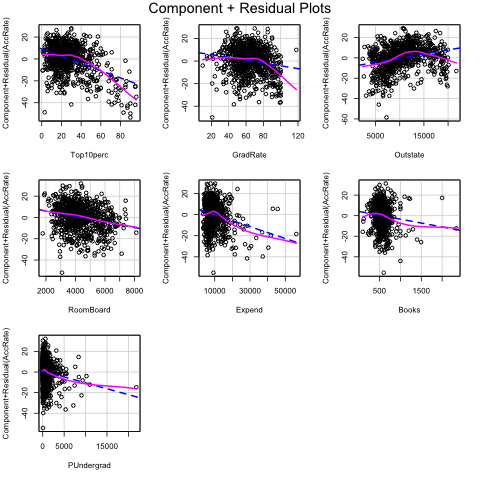

In [54]:
%%R
library(car)
#Model 2
mreg.mod <- lm(AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Books+PUndergrad,
data=dataf1)
crPlots(mreg.mod, order=2)

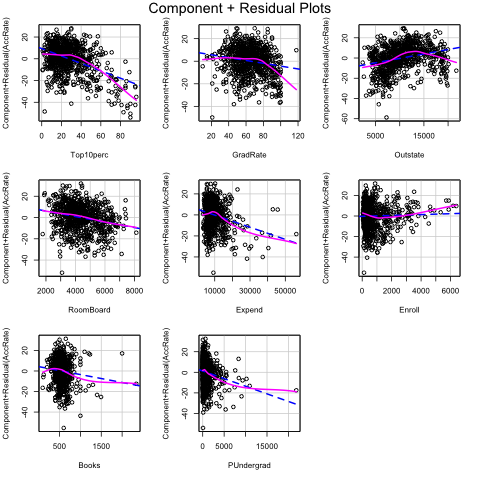

In [55]:
%%R
#Model 3
mreg.mod <- lm(AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Enroll+Books+PUndergrad,
data=dataf1)
crPlots(mreg.mod, order=2)

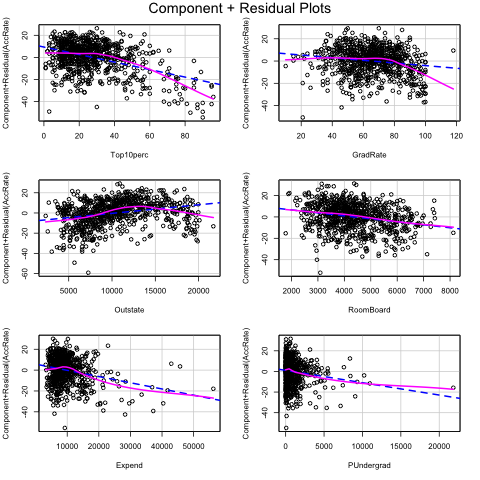

In [56]:
%%R
#Model 6
mreg.mod <- lm(AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad,
data=dataf1)
crPlots(mreg.mod, order=2)

##### Cook's distance

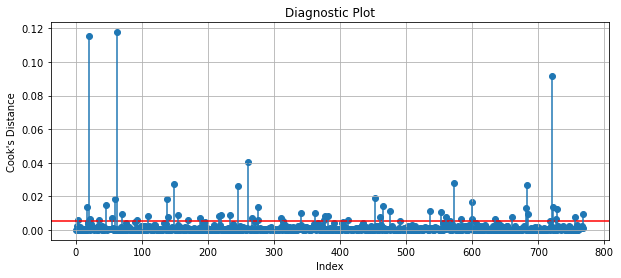

In [57]:
# Cook's distance

cooks_distance_1 = reg2.get_influence().cooks_distance
# print(cooks_distance_1)
# print(len(cooks_distance_1[0]))
plt.figure(figsize = (10,4))
plt.scatter(np.arange(len(data2)),cooks_distance_1[0])
#change the red line into the cook's distance threshold 4/n
plt.axhline(4/len(data2), color = 'red')
plt.vlines(x=np.arange(len(data2)), ymin=0, ymax=cooks_distance_1[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [58]:
#number of outliers
sum(cooks_distance_1[0]>4/len(data2))

57

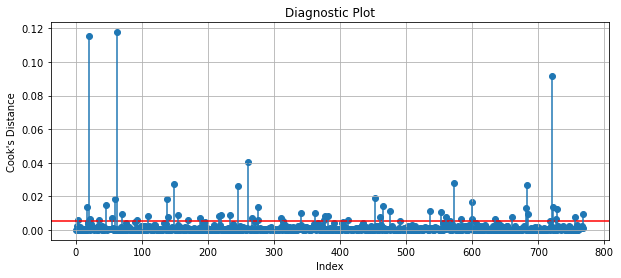

In [59]:
# Cook's distance
cooks_distance_2 = reg3.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(np.arange(len(data2)),cooks_distance_1[0])
#change the red line into the cook's distance threshold 4/n
plt.axhline(4/len(data2), color = 'red')
plt.vlines(x=np.arange(len(data2)), ymin=0, ymax=cooks_distance_1[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [60]:
#number of outliers
sum(cooks_distance_2[0]>4/len(data2))

58

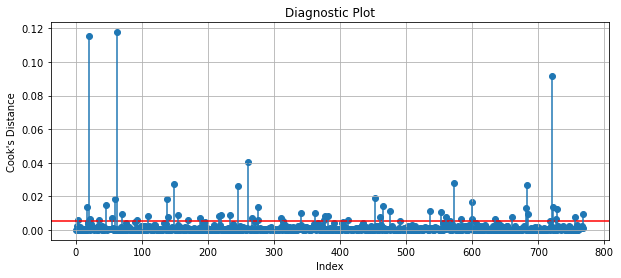

In [61]:
# Cook's distance
cooks_distance_3 = reg6.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(np.arange(len(data2)),cooks_distance_1[0])
#change the red line into the cook's distance threshold 4/n
plt.axhline(4/len(data2), color = 'red')
plt.vlines(x=np.arange(len(data2)), ymin=0, ymax=cooks_distance_1[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

In [62]:
#number of outliers
sum(cooks_distance_3[0]>4/len(data2))

52

##### Q_Q Plot

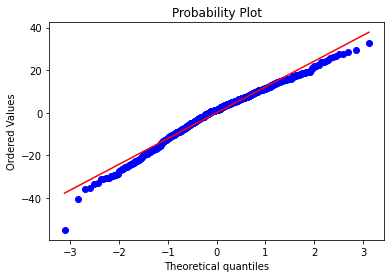

In [63]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(reg2.resid, plot = axA, fit=True)

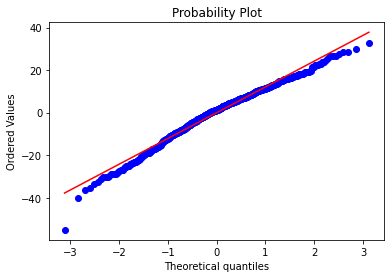

In [64]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(reg3.resid, plot = axA, fit=True)

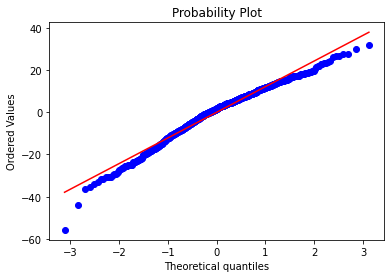

In [65]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(reg6.resid, plot = axA, fit=True)

#### Cross Validation by splitting into train and test dataset

In [66]:
#Model 2
from sklearn.model_selection import KFold # import KFold

# kf = KFold(n_splits = 3)
# for train_index, test_index in kf.split(data2):
#     print("TRAIN:", train_index, "TEST:", test_index)
    
    
# split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(data2):
    # train data over training set
    results = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Books+PUndergrad', data2.iloc[train_index]).fit()
    
    # test over last split 
    s = ((data2.iloc[test_index]["AccRate"]) - results.predict(data2.iloc[test_index])**2).mean()
    
    # append test metric
    mse.append(s)

rmse=sum(mse)/ len(mse)**0.5
print('rmse:',rmse)
print('mse:',mse)

rmse: -12475.285871288459
mse: [-5674.038716341313, -5658.1022842521215, -5688.301719062237, -5492.14265472821, -5383.001872559807]


In [67]:
#Model 3
from sklearn.model_selection import KFold # import KFold

# kf = KFold(n_splits = 3)
# for train_index, test_index in kf.split(data2):
#     print("TRAIN:", train_index, "TEST:", test_index)
    
    
# split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(data2):
    # train data over training set
    results = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+Enroll+Books+PUndergrad', data2.iloc[train_index]).fit()
    
    # test over last split 
    s = ((data2.iloc[test_index]["AccRate"]) - results.predict(data2.iloc[test_index])**2).mean()
    
    # append test metric
    mse.append(s)

rmse=sum(mse)/ len(mse)**0.5
print('rmse:',rmse)
print('mse:',mse)

rmse: -12473.523004073197
mse: [-5662.15994133449, -5646.550817273961, -5690.167199949446, -5487.702155322579, -5405.065242134579]


In [68]:
#Model 6
from sklearn.model_selection import KFold # import KFold

# kf = KFold(n_splits = 3)
# for train_index, test_index in kf.split(data2):
#     print("TRAIN:", train_index, "TEST:", test_index)
    
    
# split the data into 5 subsets
kf = KFold(n_splits = 5)

mse = []
for train_index, test_index in kf.split(data2):
    # train data over training set
    results = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad', data2.iloc[train_index]).fit()
    
    # test over last split 
    s = ((data2.iloc[test_index]["AccRate"]) - results.predict(data2.iloc[test_index])**2).mean()
    
    # append test metric
    mse.append(s)

rmse=sum(mse)/ len(mse)**0.5
print('rmse:',rmse)
print('mse:',mse)

rmse: -12470.257989277885
mse: [-5675.746309628533, -5639.303732362968, -5688.182345376625, -5492.818003842896, -5388.294169774174]


Based on the RMSE score in 5 Fold Cross Validation, Q_Q plot, and Residual Plot, we choose Model 6 with lower RMSE and fewer Outliers.

We select 1 model and try to lead to the final model:<br />

Model 6:<br />
('Top10perc', 'GradRate', 'Outstate', 'RoomBoard', 'Expend', 'PUndergrad')<br />

#### Model Misspecification

In [69]:
# Model Misspecification
#Model 2
import statsmodels.regression.linear_model as rg
import statsmodels.stats.diagnostic as dg

test =  dg.linear_reset(reg2, power=2,  test_type='fitted', use_f = True)

print("Ramsey-RESET:")
print(test)
# Fail to reject Ho, therefore, the model seems to be correctly specified at order 2.

# Note: We can do an added sanity check by estimating two more models: 

#(a) include a quadratic term
print("Quadratic Model")
smf.ols(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad + I(GradRate**2)', data = data2).fit().summary()


Ramsey-RESET:
<F test: F=35.30746506694766, p=4.286101830271827e-09, df_denom=760, df_num=1>
Quadratic Model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     55.31
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.24e-64
Time:                        13:47:15   Log-Likelihood:                -2998.9
No. Observations:                 769   AIC:                             6014.
Df Residuals:                     761   BIC:                             6051.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           72.0263      4.873     14.781      0.000      62.461      81.592
Top10perc           -0.3021      0.035     -8.511      0.000      -0.372      -0.232
GradRate             0.7583      0.147      5.175      0.000       0.471       1.046
Outstate             0.0010      0.000      5.441      0.000       0.001       0.001
RoomBoard           -0.0027      0.001     -5.037      0.000      -0.004      -0.002
Expend              -0.0005      0.000     -3.898      0.000      -0.001      -0.000
PUndergrad          -0.0013      0.000     -3.592      0.000      -0.002      -0.001
I(GradRate ** 2)    -0.0068      0.001     -6.093      0.000      -0.009      -0.005
==============================================================================
Omnibus:                       36.377   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.398
Skew:                          -0.534   Prob(JB):                     1.69e-09
Kurtosis:                       3.344   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#(a) include an interation term
print("Interaction Model")
smf.ols(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+ GradRate*Expend', data = data2).fit().summary()

Interaction Model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     56.92
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.58e-65
Time:                        13:47:15   Log-Likelihood:                -2995.1
No. Observations:                 769   AIC:                             6006.
Df Residuals:                     761   BIC:                             6043.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          76.9560      3.891     19.776      0.000      69.317      84.595
Top10perc          -0.2629      0.036     -7.302      0.000      -0.334      -0.192
GradRate            0.1755      0.054      3.261      0.001       0.070       0.281
Outstate            0.0009      0.000      4.917      0.000       0.001       0.001
RoomBoard          -0.0028      0.001     -5.172      0.000      -0.004      -0.002
Expend              0.0020      0.000      4.765      0.000       0.001       0.003
PUndergrad         -0.0014      0.000     -3.966      0.000      -0.002      -0.001
GradRate:Expend -3.322e-05   4.95e-06     -6.706      0.000   -4.29e-05   -2.35e-05
==============================================================================
Omnibus:                       52.650   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.454
Skew:                          -0.610   Prob(JB):                     6.12e-15
Kurtosis:                       3.745   Cond. No.                     7.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the RESET test and meaning of every variable, we need to reasonablly add quaratic term of GradRate and interactive term of GradRate*Expend into the model.

#### Model with added quadratic and interactive terms

##### Y: AccRate X1: Top10perc X2: GradRate X3: Outstate X4: RoomBoard X5: Expend X6: PUndergrad X7: GradRate*Expend X8: I(GradRate**2)

In [71]:
reg=smf.ols(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)', data = data2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AccRate   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     53.35
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.23e-68
Time:                        13:47:15   Log-Likelihood:                -2985.7
No. Observations:                 769   AIC:                             5989.
Df Residuals:                     760   BIC:                             6031.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           61.8252      5.185     11.924      0.000      51.647      72.004
Top10perc           -0.2663      0.036     -7.481      0.000      -0.336      -0.196
GradRate             0.7584      0.144      5.262      0.000       0.475       1.041
Outstate             0.0009      0.000      4.950      0.000       0.001       0.001
RoomBoard           -0.0028      0.001     -5.238      0.000      -0.004      -0.002
Expend               0.0015      0.000      3.593      0.000       0.001       0.002
PUndergrad          -0.0013      0.000     -3.827      0.000      -0.002      -0.001
GradRate:Expend  -2.648e-05   5.14e-06     -5.157      0.000   -3.66e-05   -1.64e-05
I(GradRate ** 2)    -0.0050      0.001     -4.351      0.000      -0.007      -0.003
==============================================================================
Omnibus:                       43.003   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.842
Skew:                          -0.565   Prob(JB):                     1.50e-11
Kurtosis:                       3.529   Cond. No.                     1.00e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Marginal Effect

R[write to console]: lattice theme set by effectsTheme()
See ?effectsTheme for details.



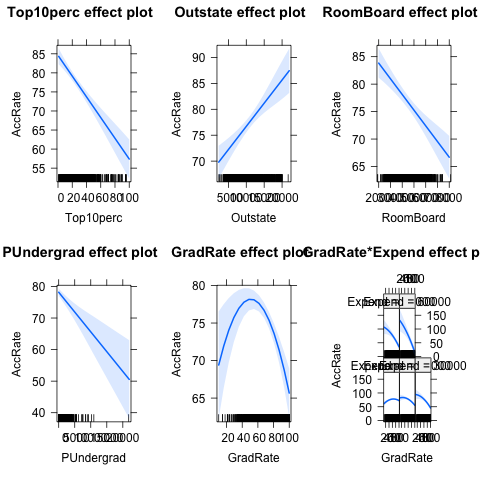

In [72]:
%%R
# install.packages('effects')
library(effects)
mreg.mod <- lm(AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate^2), data=dataf1)
plot(allEffects(mreg.mod))

In [73]:
%%R
#install.packages('margins')
library("margins") 
m <- margins(mreg.mod)
summary(m)

     factor     AME     SE       z      p   lower   upper
     Expend -0.0001 0.0001 -0.9716 0.3312 -0.0004  0.0001
   GradRate -0.1507 0.0324 -4.6524 0.0000 -0.2141 -0.0872
   Outstate  0.0009 0.0002  4.8573 0.0000  0.0005  0.0013
 PUndergrad -0.0013 0.0003 -4.2122 0.0000 -0.0018 -0.0007
  RoomBoard -0.0029 0.0005 -5.4522 0.0000 -0.0039 -0.0018
  Top10perc -0.2720 0.0349 -7.7927 0.0000 -0.3404 -0.2036


In [74]:
%%R
summary(margins(mreg.mod, variables = "GradRate"))

   factor     AME     SE       z      p   lower   upper
 GradRate -0.1507 0.0324 -4.6524 0.0000 -0.2141 -0.0872


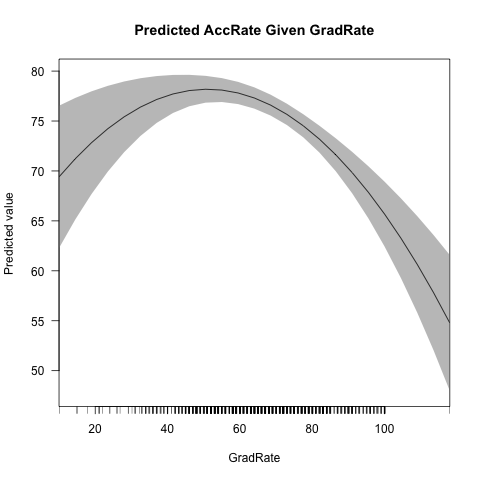

In [75]:
%%R
cplot(mreg.mod, "GradRate", what = "prediction", main = "Predicted AccRate Given GradRate")

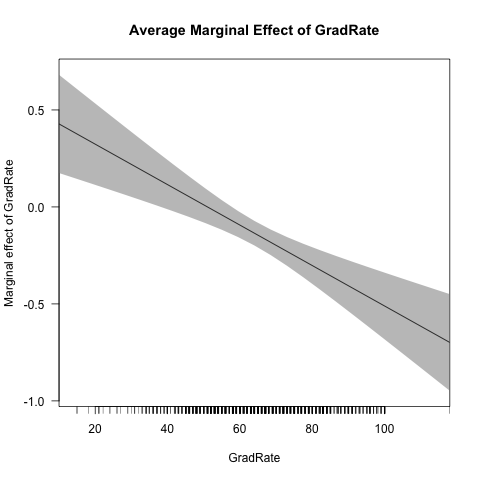

In [76]:
%%R
cplot(mreg.mod, "GradRate", what = "effect", main = "Average Marginal Effect of GradRate")

#### Bootstrap

In [77]:
#Y: AccRate X1: Top10perc X2: GradRate X3: Outstate 
#X4: RoomBoard X5: Expend X6: PUndergrad X7: GradRate*Expend X8: I(GradRate**2)

# build dataframe to store sample statistics
coefs1 = pd.DataFrame()
coefs2 = pd.DataFrame()
coefs3 = pd.DataFrame()
coefs4 = pd.DataFrame()
coefs5 = pd.DataFrame()
coefs6 = pd.DataFrame()
coefs7 = pd.DataFrame()
coefs8 = pd.DataFrame()

# we will generate 1000 bootstrap samples
for i in range(1000):
    
    # sample from the data with replacement N times
    sample = data2.sample(data2.shape[0] ,replace = True)
    
    # fit model on bootstrap sample
    results = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)', sample).fit()
    
    # pull out the bootstrap sample statistics
    b0,b1,b2,b3,b4,b5,b6,b7,b8 = results.params
    adjR2=results.rsquared_adj
    # store the bootstrap sample statistics for later use
    coefs1 = pd.concat([coefs1,pd.DataFrame.from_records([{"B0":b0, "B1":b1,"AdjR1":adjR2}])])
    coefs2 = pd.concat([coefs2,pd.DataFrame.from_records([{"B0":b0, "B2":b2,"AdjR2":adjR2}])])
    coefs3 = pd.concat([coefs3,pd.DataFrame.from_records([{"B0":b0, "B3":b3,"AdjR3":adjR2}])])
    coefs4 = pd.concat([coefs4,pd.DataFrame.from_records([{"B0":b0, "B4":b4,"AdjR4":adjR2}])])
    coefs5 = pd.concat([coefs5,pd.DataFrame.from_records([{"B0":b0, "B5":b5,"AdjR5":adjR2}])])
    coefs6 = pd.concat([coefs6,pd.DataFrame.from_records([{"B0":b0, "B6":b6,"AdjR6":adjR2}])])
    coefs7 = pd.concat([coefs7,pd.DataFrame.from_records([{"B0":b0, "B7":b7,"AdjR7":adjR2}])])
    coefs8 = pd.concat([coefs8,pd.DataFrame.from_records([{"B0":b0, "B8":b8,"AdjR8":adjR2}])])
# below I calculate the percentile bootstraps for a 95% confidence interval


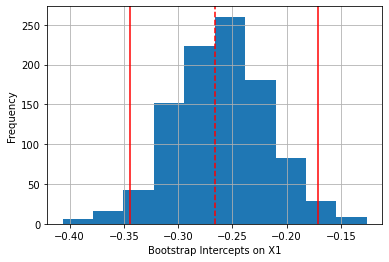

In [78]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b1_u,adjR1_u = coefs1.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b1_l,adjR1_l = coefs1.quantile(.025)

coefs1.B1.hist()

plt.xlabel("Bootstrap Intercepts on X1")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[1],color='red',linestyle='--')
plt.axvline(b1_u, color = "red")
plt.axvline(b1_l, color = "red")

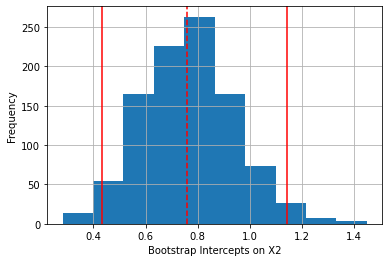

In [79]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b2_u,adjR2_u = coefs2.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b2_l,adjR2_l = coefs2.quantile(.025)

coefs2.B2.hist()

plt.xlabel("Bootstrap Intercepts on X2")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[2],color='red',linestyle='--')
plt.axvline(b2_u, color = "red")
plt.axvline(b2_l, color = "red")

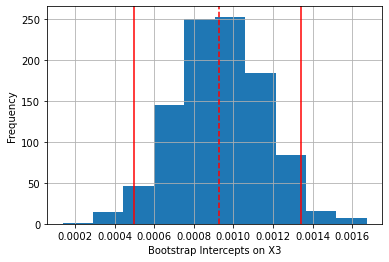

In [80]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b3_u,adjR3_u = coefs3.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b3_l,adjR3_l = coefs3.quantile(.025)

coefs3.B3.hist()

plt.xlabel("Bootstrap Intercepts on X3")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[3],color='red',linestyle='--')
plt.axvline(b3_u, color = "red")
plt.axvline(b3_l, color = "red")

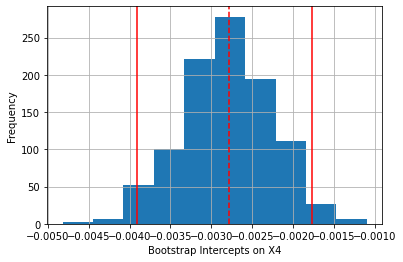

In [81]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b4_u,adjR4_u = coefs4.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b4_l,adjR4_l = coefs4.quantile(.025)

coefs4.B4.hist()

plt.xlabel("Bootstrap Intercepts on X4")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[4],color='red',linestyle='--')
plt.axvline(b4_u, color = "red")
plt.axvline(b4_l, color = "red")

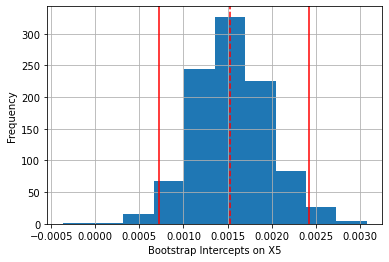

In [82]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b5_u,adjR5_u = coefs5.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b5_l,adjR5_l = coefs5.quantile(.025)

coefs5.B5.hist()

plt.xlabel("Bootstrap Intercepts on X5")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[5],color='red',linestyle='--')
plt.axvline(b5_u, color = "red")
plt.axvline(b5_l, color = "red")

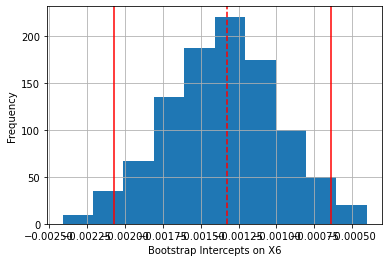

In [83]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b6_u,adjR6_u = coefs6.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b6_l,adjR6_l = coefs6.quantile(.025)

coefs6.B6.hist()

plt.xlabel("Bootstrap Intercepts on X6")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[6],color='red',linestyle='--')
plt.axvline(b6_u, color = "red")
plt.axvline(b6_l, color = "red")

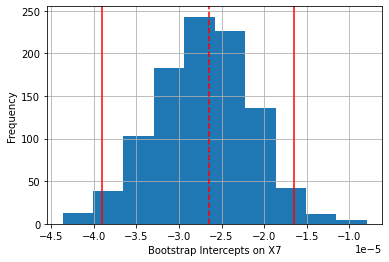

In [84]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b7_u,adjR7_u = coefs7.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b7_l,adjR7_l = coefs7.quantile(.025)

coefs7.B7.hist()

plt.xlabel("Bootstrap Intercepts on X7")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[7],color='red',linestyle='--')
plt.axvline(b7_u, color = "red")
plt.axvline(b7_l, color = "red")

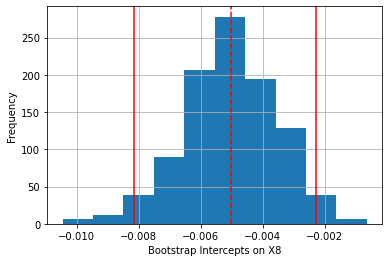

In [85]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u, b8_u,adjR8_u = coefs8.quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_l, b8_l,adjR8_l = coefs8.quantile(.025)

coefs8.B8.hist()

plt.xlabel("Bootstrap Intercepts on X8")
plt.ylabel("Frequency")
plt.axvline(x=reg.params[8],color='red',linestyle='--')
plt.axvline(b8_u, color = "red")
plt.axvline(b8_l, color = "red")

#### Heteroskedasticity

In [86]:
# BP test
import statsmodels.stats.api as sms
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(reg.resid, reg.model.exog)
print("BP Results:")
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 45.90257706152288), ('p-value', 2.4805361515318356e-07), ('f-value', 6.030646331339087), ('f p-value', 1.561079794911418e-07)]


#### Resolve Heteroskedasticity by WLS (Known)

In [87]:
# Estimate model:
reg=smf.ols(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)', data = data2)
results_ols= reg.fit(cov_type='HC0')

table_ols = pd.DataFrame({'b': round(results_ols.params, 6),
                          'se': round(results_ols.bse, 4),
                          't': round(results_ols.tvalues, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

# WLS: here we use w = 1/x
wls_weight = list(1 / data2['AccRate'])
reg_wls_k = smf.wls(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)',
                  weights=wls_weight, data=data2)
results_wls_k = reg_wls_k.fit()

# print regression table:
table_wls = pd.DataFrame({'b': round(results_wls_k.params, 6),
                          'se': round(results_wls_k.bse, 4),
                          't': round(results_wls_k.tvalues, 4),
                          'pval': round(results_wls_k.pvalues, 4)})
print(f'table_wls: \n{table_wls}\n')

table_ols: 
                          b      se        t    pval
Intercept         61.825243  5.8551  10.5592  0.0000
Top10perc         -0.266263  0.0414  -6.4385  0.0000
GradRate           0.758410  0.1753   4.3258  0.0000
Outstate           0.000927  0.0002   4.2768  0.0000
RoomBoard         -0.002783  0.0005  -5.1049  0.0000
Expend             0.001530  0.0004   4.0483  0.0001
PUndergrad        -0.001328  0.0003  -3.8162  0.0001
GradRate:Expend   -0.000026  0.0000  -5.1397  0.0000
I(GradRate ** 2)  -0.005019  0.0015  -3.4348  0.0006

table_wls: 
                          b      se       t    pval
Intercept         51.487362  5.4206  9.4984  0.0000
Top10perc         -0.336877  0.0361 -9.3403  0.0000
GradRate           0.996600  0.1514  6.5814  0.0000
Outstate           0.001143  0.0002  5.9771  0.0000
RoomBoard         -0.003018  0.0006 -5.3601  0.0000
Expend             0.001695  0.0004  3.7737  0.0002
PUndergrad        -0.001117  0.0004 -3.0614  0.0023
GradRate:Expend   -0.000027  

#### Retest Heteroskedasticity

In [88]:
# WLS-BP test
import statsmodels.stats.api as sms
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results_wls_k.resid, results_wls_k.model.exog)
print("BP Results:")
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 54.62111655930789), ('p-value', 5.230340634932984e-09), ('f-value', 7.263661053560579), ('f p-value', 2.562308351484257e-09)]


In [89]:
def spread_level(model, data):
    df_copy = data2.copy()
    
    # Get the studentized residuals
    df_copy["Absolute_Studentized_Residuals"] = (np.abs(model.get_influence().resid_studentized))
    df_copy["Fitted_Values"] = (model.fittedvalues)
    
    # run regression to get slope of fitted vs resid, rlm is a robust linear model used by R
    slreg = smf.rlm("np.log(Absolute_Studentized_Residuals) ~ np.log(Fitted_Values)", df_copy).fit()
    slope = slreg.params[1]
    
    # plot values
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_title("Fitted Values vs Studentized Residuals")
    sns.regplot(x = "Fitted_Values", y = "Absolute_Studentized_Residuals", data = df_copy, lowess = True, ax = ax)
    ax.plot(df_copy.Fitted_Values.values, np.exp(slreg.fittedvalues).values)
    
    # Set to the logarithmic scale
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # convert froms scientific notation to scalar notation
    #ax.yaxis.set_major_formatter(ScalarFormatter())
    #ax.xaxis.set_major_formatter(ScalarFormatter())
    
    # Resolve overlapping label bug
    ax.minorticks_off()
    
    # Set tick labels automatically
    ax.set_xticks(np.linspace(df_copy["Fitted_Values"].min(),df_copy["Fitted_Values"].max(), 6))
    ax.set_yticks(np.linspace(df_copy["Absolute_Studentized_Residuals"].min(),
                              df_copy["Absolute_Studentized_Residuals"].max(), 6))
    
    ax.grid()
    
    # return a suggested power transform of your y-variable that may correct heteroscedastcity
    # The transform is just one minus the slope of the reegression line of your fitted values vs residuals
    print("Suggested Power Transformation:", 1-slope)

Suggested Power Transformation: 1.4986072664198886


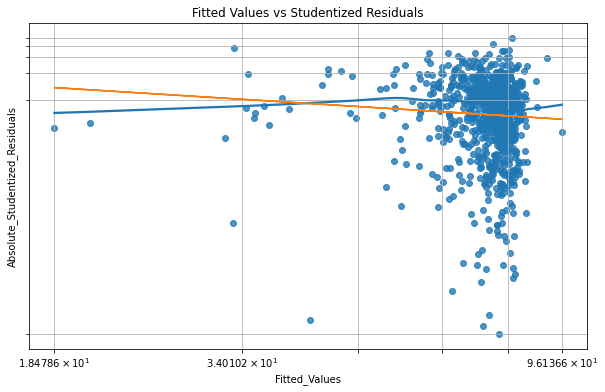

In [90]:
model = smf.ols('AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)',
                  data=data2)
results = model.fit()
spread_level(results, data2)

#### Resolve Heteroskedasticity by WLS (Unknown)

In [92]:

# FGLS (estimation of the variance function):
data2['logu2'] = np.log(results.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)', data=data2)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 6),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='AccRate ~ Top10perc+GradRate+Outstate+RoomBoard+Expend+PUndergrad+GradRate*Expend+I(GradRate**2)',
                  weights=wls_weight, data=data2)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 6),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                         b      se       t    pval
Intercept         6.545738  0.9850  6.6454  0.0000
Top10perc         0.020984  0.0068  3.1033  0.0020
GradRate         -0.052849  0.0274 -1.9301  0.0540
Outstate         -0.000180  0.0000 -5.0522  0.0000
RoomBoard         0.000077  0.0001  0.7595  0.4478
Expend           -0.000089  0.0001 -1.0989  0.2721
PUndergrad       -0.000131  0.0001 -1.9892  0.0470
GradRate:Expend   0.000001  0.0000  1.0666  0.2865
I(GradRate ** 2)  0.000374  0.0002  1.7083  0.0880

FGLS Estimates: 
                          b      se       t    pval
Intercept         53.596227  5.6655  9.4601  0.0000
Top10perc         -0.209485  0.0356 -5.8918  0.0000
GradRate           0.956689  0.1650  5.7981  0.0000
Outstate           0.000052  0.0002  0.3326  0.7396
RoomBoard         -0.001223  0.0004 -2.7514  0.0061
Expend             0.001635  0.0003  6.2132  0.0000
PUndergrad        -0.001333  0.0003 -5.0444  0.0000
GradRate:Expend   -0.000027  

#### Retest Heteroskedasticity

In [93]:
# WLS-BP test
import statsmodels.stats.api as sms
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results_wls.resid, results_wls.model.exog)
print("BP Results:")
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 70.08270977761651), ('p-value', 4.731571078095539e-12), ('f-value', 9.525958968270986), ('f p-value', 1.2924079034426948e-12)]
